In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


## Sentiment distribution

(-1.0134973589447356,
 1.0000000209436062,
 -1.0104870255027887,
 1.0085293797545596)

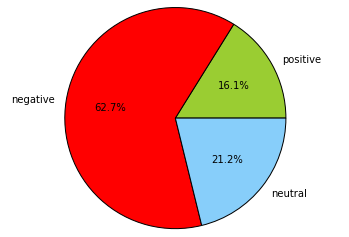

In [2]:
%matplotlib inline
labels = ['positive', 'negative', 'neutral']
sizes = [sum(df['airline_sentiment'] == label) for label in labels]
colors = ['yellowgreen', 'red', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')


## Word frequency distribution

We are interested in the terms frequency distribution since we want to know what frequency we should make the cut-off.
We eliminated stop words and tokenized the tweets using the TweetTokenizer provided by NLTK.


In [3]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 14640 tweets
Training sample size: 13111
Testing sample size: 1529


We have a vocabulary with 17639 words.


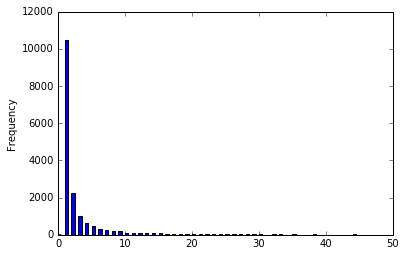

In [4]:
from collections import defaultdict

freq = defaultdict(int)
for tokens, _ in training_data:
    for token in tokens:
        freq[token] += 1

print("We have a vocabulary with {0} words.".format(len(freq))) 
freq_list = sorted([(value, key) for key, value in freq.items()])
freq_list = pandas.Series(list(freq.values()))
freq_list.plot(kind='hist', bins = 100, range=(0, 50))

### Viewing number of features based on word min frequency

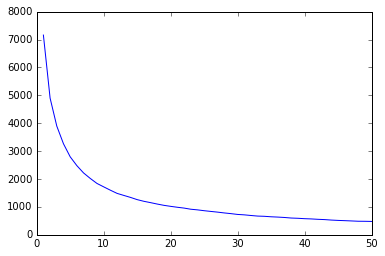

In [5]:
min_freq_range = list(range(1, 51))
features_count = [sum(freq_list > x) for x in min_freq_range]
plt.plot(min_freq_range, features_count)

## Exploring accuracy with various min_freq values

We will use a NaiveBayes classifier, with the default parameters, since it trains faster.

In [6]:
from nltk.sentiment import SentimentAnalyzer
from nltk.classify import NaiveBayesClassifier
from lib import classify

min_freq_range = list(range(5, 21))
accuracy = []
for x in min_freq_range:
    print("Using min frequency of", x)
    sentim_analyzer = SentimentAnalyzer()
    classify.add_features(training_data, sentim_analyzer, min_freq = x)
    train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)
    trainer = {
        'train': NaiveBayesClassifier.train,
    }
    _, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    accuracy.append(evaluation['Accuracy'])


Using min frequency of 5
Number of features: 2796
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 6
Number of features: 2478
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 7
Number of features: 2217
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 8
Number of features: 2020
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 9
Number of features: 1841
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 10
Number of features: 1719
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 11
Number of features: 1599
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 12
Number of features: 1485
Training classifier
Evaluating NaiveBayesClassifier results...
Using min frequency of 13
Number of features: 1412
Training classifier
Evaluating NaiveBayesC

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.76, 0.76, 0.76, 0.76, 0.75, 0.76, 0.76]


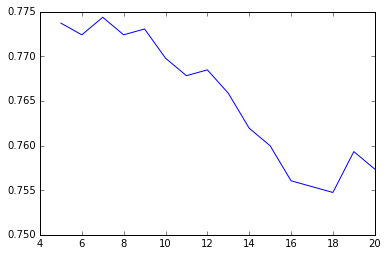

In [11]:
print(min_freq_range)
acc = [round(x, 2) for x in accuracy]
print(acc)
plt.plot(min_freq_range, accuracy)

## Conclusion

We will chose to have as features only terms with frequency higher than 10, since it constitues a nice trade-off between accuracy and feature space. 